### Laptop Price Prediction

The goals of this project is to make a prediction of laptop's price. 

We first analyze the dataset and explore it. After some preprocessing step, we will use an machine learning algorithm to make the predicition. Note that `price` is a continuous value, so we will use a regression model

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/laptop_price.csv', encoding='latin-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Data exploration and analysis

In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 1303 rows and 13 columns


In [10]:
print(f'Features of this dataset are: {df.columns}')

Features of this dataset are: Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


In [7]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


This Dataset has 13 features:
- laprtop_ID: id for each laptop in the dataset
- Company: company/manufacturer name
- Product : brand and model
- TypeName : type (Notebook, Ultrabook, Gaming, etc.)
- Inches : screen size
- ScreenResolution : screen resolution
- Cpu : Central Processing Unit (CPU)
- Ram : laptop RAM
- Memory : Hard Disk / SSD Memory
- GPU : Graphics Processing Units (GPU)
- OpSys : Operating System
- Weight : Laptop Weight
- Price_euros : Price (Euro)



The target feature is `Price_euros`, while the other features are the indipendent variables. 

From `name_dataset.info()` we get some information about the datset. For example, we can check if there sare missing values and verify the type of each column. <br>
Note that some of the features are in *object* type, so we will extract from them some useful information and process them into numeric type. This process is needed beacuse the most of machine learning model work with numeric type of data. 

There is another way to check the existance of missing values:

In [122]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Check the existance of duplicated rows

In [9]:
df.duplicated().sum()

0

From a first sight, we can see that some information (i.e. ScreenResolution dimension) belongs to *object* type. Obviously, these are useful data for making a laptop's price prediction.

Before extract them, we will analyse the other features which do not contain numeric value

In [11]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [105]:
df.Product.unique().sum()

AttributeError: 'DataFrame' object has no attribute 'Product'

In [13]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

We can see that in `Product` features there are a lot of unique rows. So We could think to drop thi column from our dataset

In [4]:
df = df.drop(columns='Product')

### Data Preprocessing

We want extract numeric values from some *object* type features. 

We will get :
- `ScreenWidth` and `ScreenHeigth` from `ScreenResolution`
- `Ram` numeric value from `Ram`
- `CpuBrand` and `CpuFrequency` from`Cpu`
- `MemoryAmount` and `MemoryType` from `Memory`
- `Weight` numeric value from `Weight`

In [5]:
df['ScreenWidth'] = df['ScreenResolution'].apply(lambda row : row.split()[-1].split('x')[0]).astype('int')
df['ScreenHeigth'] = df['ScreenResolution'].apply(lambda row : row.split()[-1].split('x')[1]).astype('int')

In [125]:
# Check Ram has only GB
df.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [6]:
df['Ram'] = df['Ram'].str[:-2].astype('int')

In [7]:
df.Ram.unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

In [8]:
df['Weight'] = df['Weight'].str[:-2].astype('float')

In [9]:
def intel_split(text):
    text = text.split(' ')
    if(text[2] == 'i5'):
        text = 'Intel Core i5'
    elif (text[2] == 'i3'):
        text = 'Intel Core i3'
    elif (text[2] == 'i7'):
        text = 'Intel Core i7'
    elif (text[0] == 'AMD'):
        text = 'AMD' 
    elif (text[0] != 'Intel'):
        text = 'Other'
    else:
        text = 'Intel Other'
    return text

In [10]:
df['CpuType'] = df['Cpu'].apply(intel_split)

In [11]:
df['GpuBrand'] = df['Gpu'].apply(lambda row: row.split(' ')[0])

In [12]:
df['CpuFrequency'] = df['Cpu'].apply(lambda row : row.split(' ')[-1][:-3]).astype('float')

In [13]:
def split_memory(text):
    x = float(text[:-2])
    y = text[-2:]
    text_list = [x,y]
    return text_list

In [14]:
def mega_byte(text):
    if 'GB' in text[1]:
        return float(text[0])*1000
    elif 'TB' in text[1]:
        return float(text[0])*1000000

In [15]:
df['MemoryAmount'] = df['Memory'].apply(lambda row : row.split(' ')[0]).apply(split_memory).apply(mega_byte).astype('float')

In [16]:
df['MemoryType'] = df['Memory'].apply(lambda row : row.split(' ')[1])

In [17]:
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenWidth,ScreenHeigth,CpuType,GpuBrand,CpuFrequency,MemoryAmount,MemoryType
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,Intel Core i5,Intel,2.3,128000.0,SSD
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,Intel Core i5,Intel,1.8,128000.0,Flash
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,Intel Core i5,Intel,2.5,256000.0,SSD
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,Intel Core i7,AMD,2.7,512000.0,SSD
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,Intel Core i5,Intel,3.1,256000.0,SSD


In [18]:
df = df.drop(columns=['ScreenResolution', 'Cpu', 'Memory', 'Gpu'])

### Data Visualization

In [19]:
def box_plot_price(feature, color, title):
    plt.figure(figsize=(10,8))
    sns.boxplot(data = df, x = 'Price_euros', y = feature, color = color)
    plt.title(f"Laptop price by {title}")

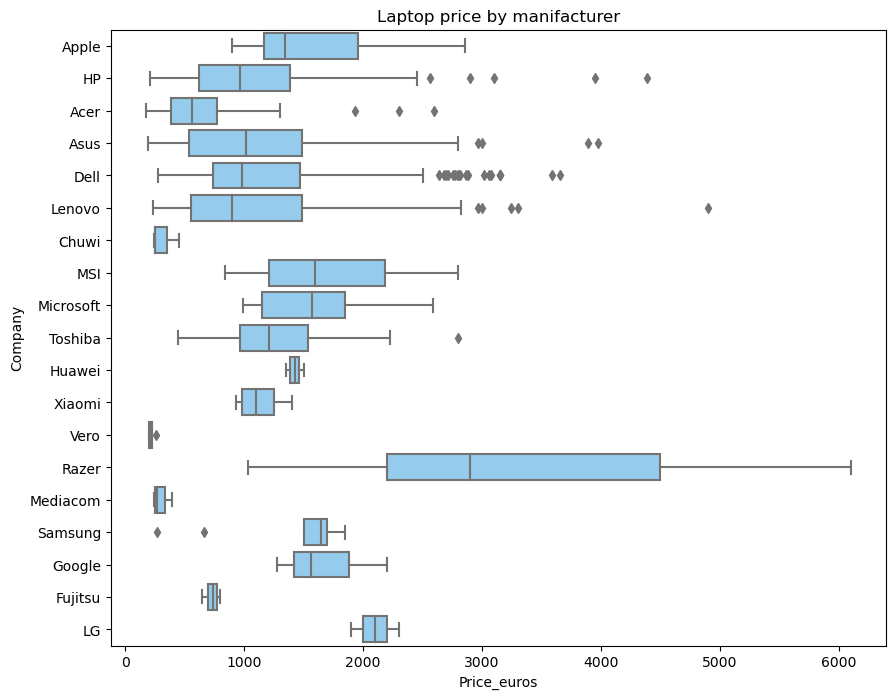

In [20]:
box_plot_price('Company', "lightskyblue", 'manifacturer')

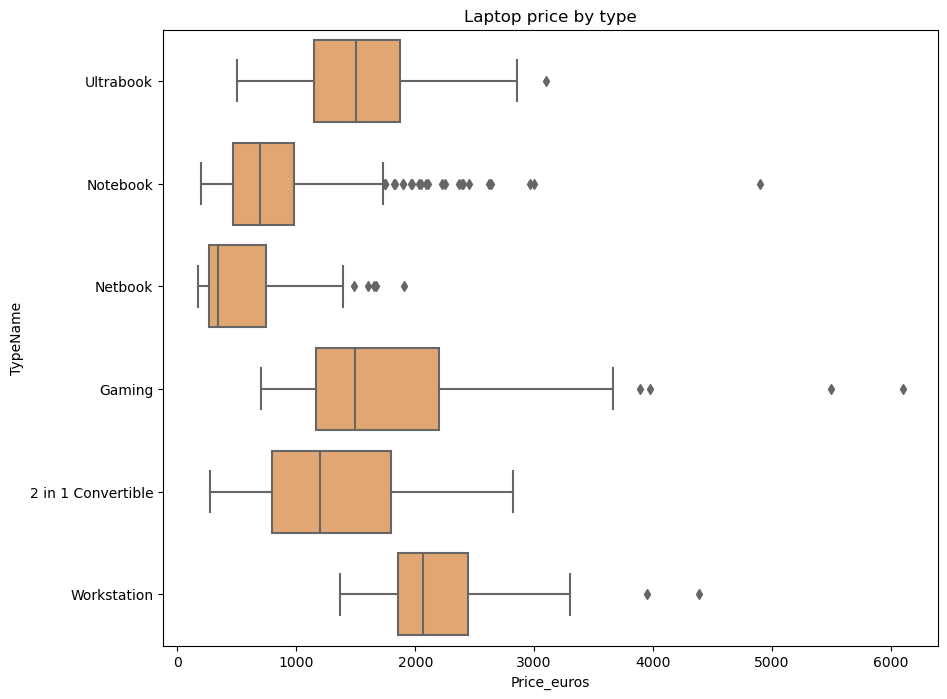

In [21]:
box_plot_price('TypeName', "sandybrown", 'type')

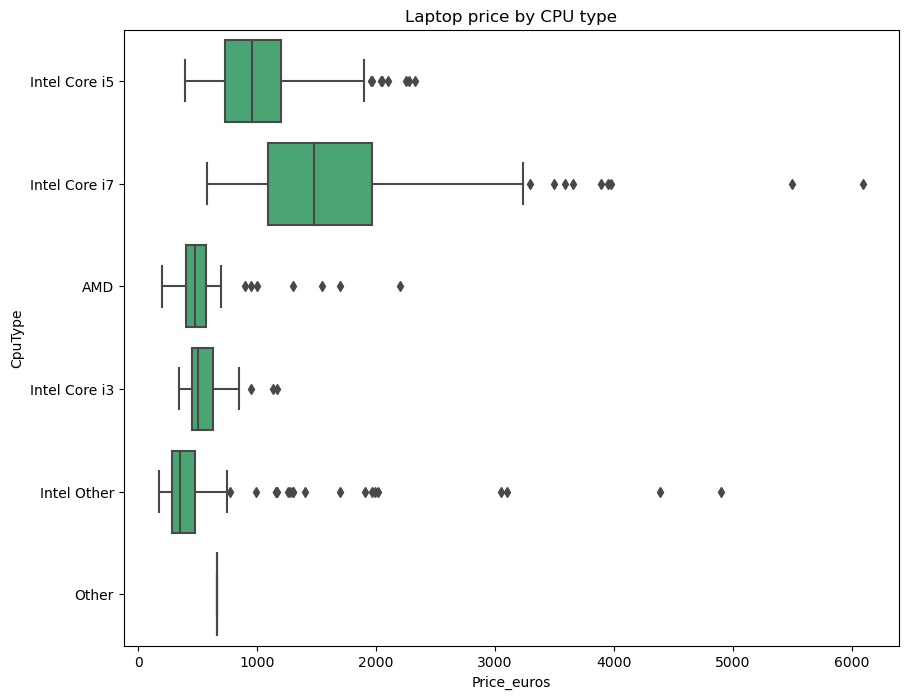

In [22]:
box_plot_price('CpuType', "mediumseagreen", 'CPU type')

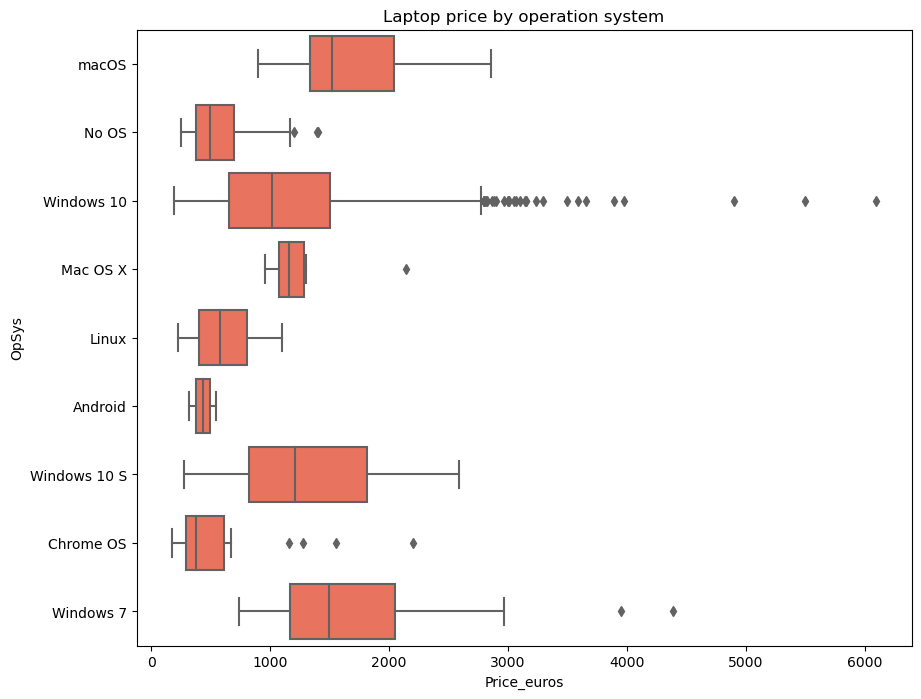

In [23]:
box_plot_price('OpSys', "tomato", 'operation system')

### Encoding

In [30]:
df = df.join(pd.get_dummies(df['Company'], dtype='int'))

In [32]:
df = df.join(pd.get_dummies(df['OpSys'], dtype='int'))

In [36]:
df = df.join(pd.get_dummies(df['CpuType'], dtype='int'))

In [47]:
gpuBrandDf = pd.get_dummies(df['GpuBrand'], dtype='int')
gpuBrandDf.columns = [col + '_Gpu' for col in gpuBrandDf.columns]

In [50]:
df = df.join(gpuBrandDf)

In [54]:
df = df.join(pd.get_dummies(df['TypeName'], dtype='int'))

In [33]:
df = df.drop(columns=['Company', 'OpSys'])

In [52]:
df = df.drop(columns=['CpuType', 'GpuBrand'])

In [55]:
df = df.drop(columns=['TypeName'])

In [56]:
df.head()

,laptop_ID,Inches,Ram,Weight,Price_euros,ScreenWidth,ScreenHeigth,CpuFrequency,MemoryAmount,MemoryType,...,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,8,1.37,1339.69,2560,1600,2.3,128000.0,SSD,...,0,0,1,0,0,0,0,0,1,0
1,2,13.3,8,1.34,898.94,1440,900,1.8,128000.0,Flash,...,0,0,1,0,0,0,0,0,1,0
2,3,15.6,8,1.86,575.00,1920,1080,2.5,256000.0,SSD,...,0,0,1,0,0,0,0,1,0,0
3,4,15.4,16,1.83,2537.45,2880,1800,2.7,512000.0,SSD,...,1,0,0,0,0,0,0,0,1,0
4,5,13.3,8,1.37,1803.60,2560,1600,3.1,256000.0,SSD,...,0,0,1,0,0,0,0,0,1,0


In [58]:
df.corr(numeric_only=True)

,laptop_ID,Inches,Ram,Weight,Price_euros,ScreenWidth,ScreenHeigth,CpuFrequency,MemoryAmount,Acer,...,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.042878,-0.053912,0.102716,-0.000809,-0.057721,...,-0.089050,0.039920,0.094479,-0.037596,0.066227,0.032384,0.058880,-0.049769,-0.040689,0.001167
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,-0.071245,-0.095404,0.307870,0.269511,0.009435,...,0.207023,-0.052816,-0.592264,0.486561,-0.314691,0.402666,-0.314030,0.246907,-0.417950,0.098893
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,0.433121,0.424437,0.368000,0.018271,-0.138432,...,-0.093119,-0.023894,-0.319551,0.415464,0.017560,0.481728,-0.102976,-0.416486,0.087470,0.062353
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,-0.032880,-0.053846,0.320434,0.179962,0.056444,...,0.106519,-0.037026,-0.596378,0.565232,-0.236693,0.591756,-0.154059,0.034893,-0.439952,0.097031
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,0.556529,0.552809,0.430293,-0.122365,-0.208349,...,-0.199415,-0.018431,-0.184205,0.348797,0.072675,0.375789,-0.097572,-0.549248,0.255658,0.249752
ScreenWidth,-0.042878,-0.071245,0.433121,-0.032880,0.556529,1.000000,0.994219,0.183548,-0.073893,-0.148089,...,-0.099868,0.028317,-0.105671,0.186887,0.151038,0.133892,-0.124502,-0.340982,0.227349,0.085135
ScreenHeigth,-0.053912,-0.095404,0.424437,-0.053846,0.552809,0.994219,1.000000,0.169668,-0.080979,-0.150171,...,-0.100644,0.051564,-0.091678,0.170993,0.148807,0.123317,-0.124373,-0.351597,0.256503,0.080595
CpuFrequency,0.102716,0.307870,0.368000,0.320434,0.430293,0.183548,0.169668,1.000000,0.066295,-0.104940,...,0.033050,-0.016359,-0.363658,0.368158,-0.107574,0.361680,-0.173859,-0.187179,-0.009583,0.133990
MemoryAmount,-0.000809,0.269511,0.018271,0.179962,-0.122365,-0.073893,-0.080979,0.066295,1.000000,0.028170,...,0.158836,-0.031957,-0.120888,0.013372,-0.062380,-0.093098,-0.124831,0.232881,-0.120462,-0.023491
Acer,-0.057721,0.009435,-0.138432,0.056444,-0.208349,-0.148089,-0.150171,-0.104940,0.028170,1.000000,...,-0.034859,-0.008119,0.005305,0.020848,-0.015336,-0.064096,0.062698,0.117594,-0.091450,-0.044202


In [85]:
selected_features = df.corr(numeric_only=True).Price_euros.apply(abs).sort_values()[-21:]

In [86]:
limited_df = df[selected_features.index].copy()

In [87]:
limited_df

,No OS,MSI,AMD,Intel_Gpu,AMD_Gpu,Acer,Weight,Razer,Workstation,Ultrabook,...,Intel Other,Nvidia_Gpu,Gaming,CpuFrequency,Notebook,ScreenHeigth,ScreenWidth,Intel Core i7,Ram,Price_euros
0,0,0,0,1,0,0,1.37,0,0,1,...,0,0,0,2.3,0,1600,2560,0,8,1339.69
1,0,0,0,1,0,0,1.34,0,0,1,...,0,0,0,1.8,0,900,1440,0,8,898.94
2,1,0,0,1,0,0,1.86,0,0,0,...,0,0,0,2.5,1,1080,1920,0,8,575.00
3,0,0,0,0,1,0,1.83,0,0,1,...,0,0,0,2.7,0,1800,2880,1,16,2537.45
4,0,0,0,1,0,0,1.37,0,0,1,...,0,0,0,3.1,0,1600,2560,0,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,1,0,0,1.80,0,0,0,...,0,0,0,2.5,0,1080,1920,1,4,638.00
1299,0,0,0,1,0,0,1.30,0,0,0,...,0,0,0,2.5,0,1800,3200,1,16,1499.00
1300,0,0,0,1,0,0,1.50,0,0,0,...,1,0,0,1.6,1,768,1366,0,2,229.00
1301,0,0,0,0,1,0,2.19,0,0,0,...,0,0,0,2.5,1,768,1366,1,6,764.00


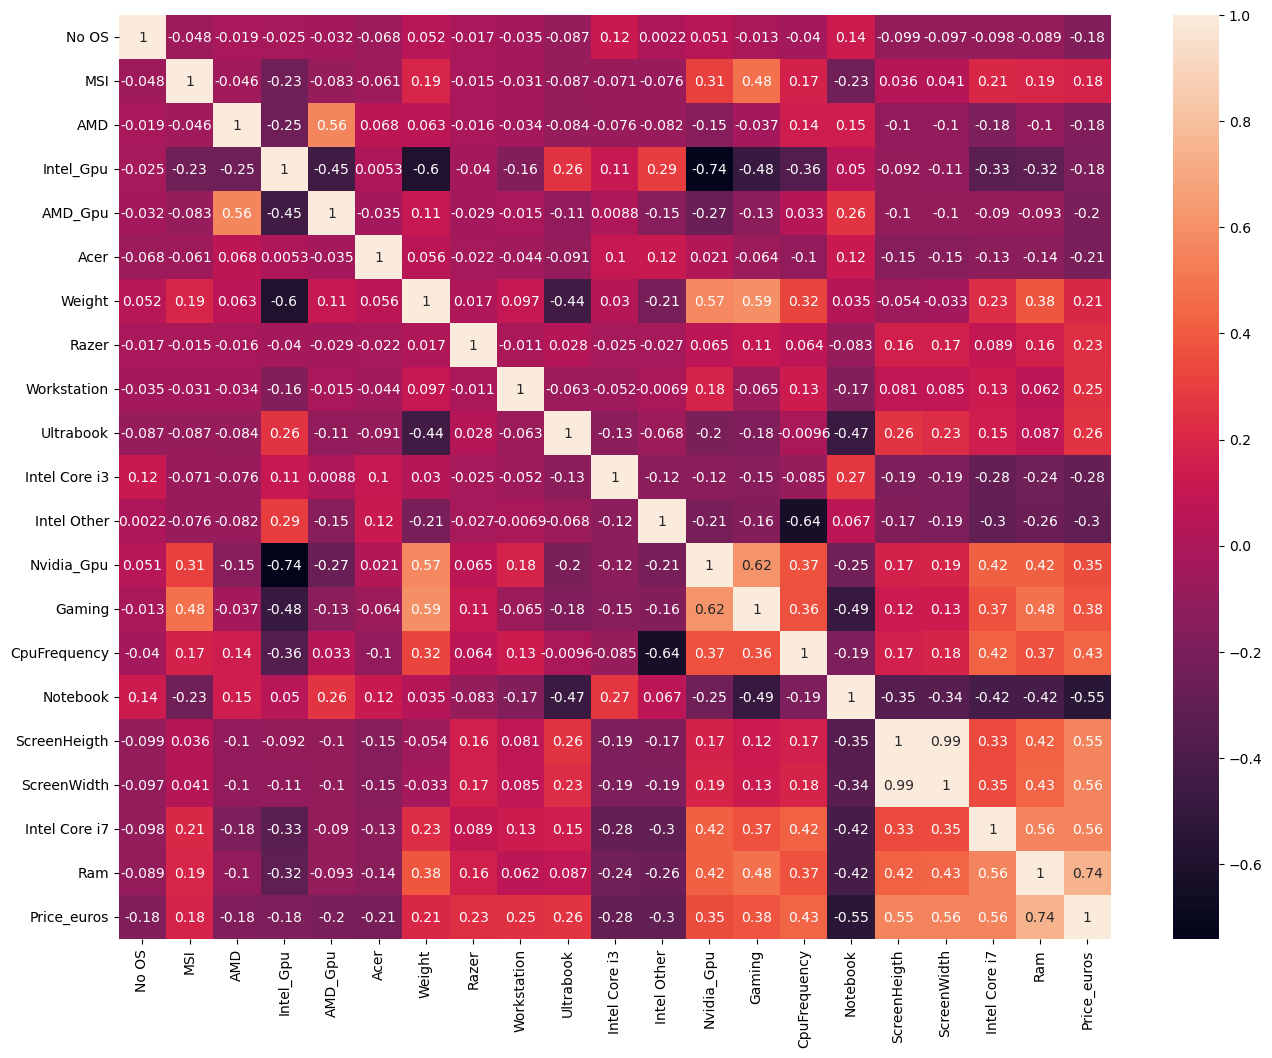

In [89]:
figure = plt.figure(figsize=(16,12))
sns.heatmap(limited_df.corr(), annot=True)
plt.show()

### Model

In [91]:
columns = limited_df.columns
X = limited_df[columns[:-1]]
y = limited_df[columns[-1]]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [93]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [94]:
forest_model = RandomForestRegressor()

forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [95]:
train_score = forest_model.score(X_train_scaled, y_train)
test_score = forest_model.score(X_test_scaled, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9658423704164831
Test Score: 0.7812971369548493


In [96]:
y_pred = forest_model.predict(X_test_scaled)

<Axes: xlabel='Price_euros'>

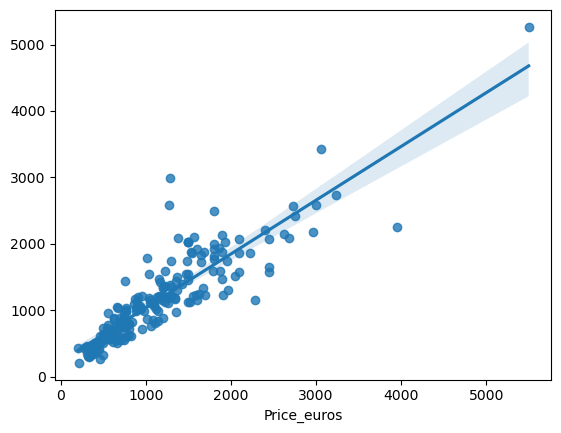

In [101]:
sns.regplot(x =y_test, y =y_pred)

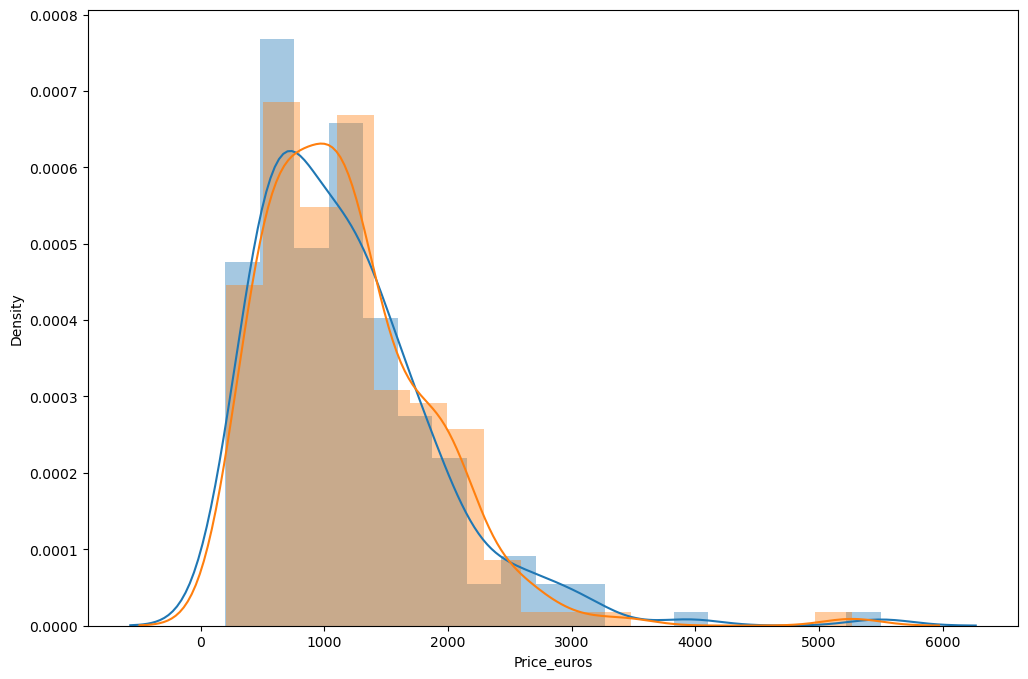

In [104]:
plt.figure(figsize=(12,8))
sns.distplot(y_test)
sns.distplot(y_pred)
plt.show()